In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/SNA Project/p2p-Gnutella05.txt"

In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)

In [5]:
sample = random.sample(res, 10000)
filename=open('data1.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
G = nx.read_edgelist(path,nodetype=int,create_using=nx.Graph())
#print(nx.info(G))

In [7]:
G1 = nx.read_edgelist('data1.txt',nodetype=int,create_using=nx.Graph())

Text(0, 0.5, 'Frequency')

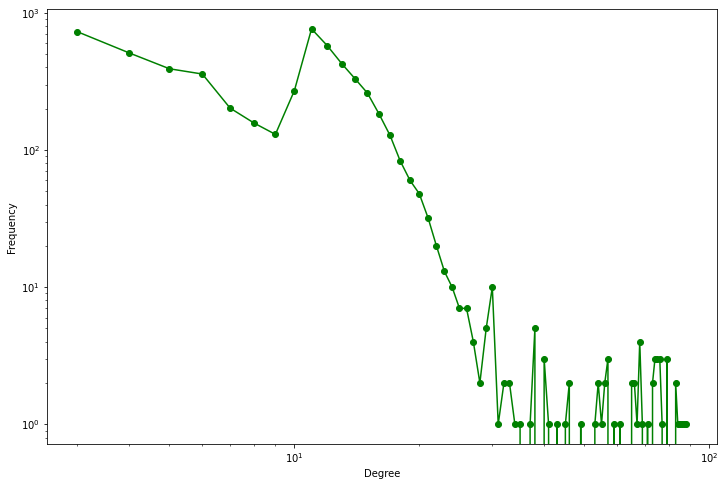

In [8]:
m=3
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [9]:
print("Maximum degree of node is",len(degree_freq)-1)

Maximum degree of node is 88


In [10]:
cnt=0
sum=0
cnt_nodes=0
for d in degree_freq:
        sum = sum + d*cnt
        cnt = cnt + 1
        cnt_nodes = cnt_nodes + d

#cnt_nodes
#print(sum)
avg_degree = sum/cnt_nodes
avg_degree

7.198507800135655

In [11]:
cnt=0
sum=0

for d in degree_freq:
        sum = sum + d*((cnt - avg_degree)**2)
        cnt = cnt + 1


std_dev_in = (sum/cnt_nodes)**0.5
std_dev_in

7.392483704276429

# **Centrality Measures**

**Degree Centrality**

In [12]:

DegreeCentrality = nx.degree_centrality(G1)
DegreeCentrality



{4628: 0.000949667616334283,
 4033: 0.0007913896802785691,
 7108: 0.000949667616334283,
 3588: 0.000949667616334283,
 4828: 0.0004748338081671415,
 1226: 0.0011079455523899967,
 2181: 0.0004748338081671415,
 1098: 0.0004748338081671415,
 8252: 0.0004748338081671415,
 3047: 0.0007913896802785691,
 632: 0.000949667616334283,
 3924: 0.00015827793605571383,
 3810: 0.0004748338081671415,
 5901: 0.0006331117442228553,
 773: 0.000949667616334283,
 3505: 0.0004748338081671415,
 8222: 0.000949667616334283,
 8408: 0.00031655587211142766,
 7214: 0.0007913896802785691,
 7833: 0.00015827793605571383,
 682: 0.000949667616334283,
 3858: 0.0007913896802785691,
 8526: 0.0007913896802785691,
 8633: 0.00015827793605571383,
 2900: 0.0007913896802785691,
 1220: 0.0011079455523899967,
 7868: 0.0004748338081671415,
 955: 0.0011079455523899967,
 2143: 0.0006331117442228553,
 3051: 0.000949667616334283,
 8662: 0.0004748338081671415,
 2685: 0.0012662234884457107,
 3273: 0.0007913896802785691,
 5599: 0.000158277

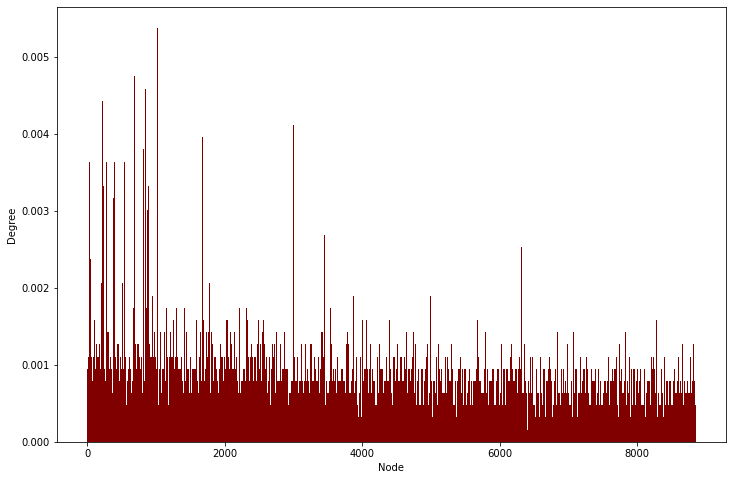

In [13]:
plt.figure(figsize=(12, 8)) 
key = list(DegreeCentrality.keys());
value = list(DegreeCentrality.values());
plt.bar(key,value, color ='maroon',width=10) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [14]:
print("Maximum value of Degree Centrality is",max(DegreeCentrality.values()))

Maximum value of Degree Centrality is 0.0053814498258942705


**Eigen Vector Centrality**

In [15]:
eigenVectorCentrality = nx.eigenvector_centrality_numpy(G1)
eigenVectorCentrality

{4628: 0.0037538016520681284,
 4033: 0.001514528437737604,
 7108: 0.0003271435161827616,
 3588: 0.002057257725613653,
 4828: 0.0030181467749837436,
 1226: 0.023263571496370886,
 2181: 0.0017901530990420346,
 1098: 0.0002466039214577552,
 8252: 0.007756777360252255,
 3047: 0.0017968868592573733,
 632: 0.0018974273632356958,
 3924: 0.00022843953702585788,
 3810: 0.00010363383055460288,
 5901: 0.0006434546467362766,
 773: 0.0007318694541359832,
 3505: 0.0024617744897843306,
 8222: 0.00041473584430064926,
 8408: 0.0001271545895138818,
 7214: 3.111231307600014e-05,
 7833: 3.745746758264776e-06,
 682: 0.007675829622678407,
 3858: 0.03992566487417772,
 8526: 2.6593791717180243e-05,
 8633: 3.201742309264734e-06,
 2900: 0.0001741126157200926,
 1220: 0.000522931203064167,
 7868: 0.0002312142184191471,
 955: 0.0014197633408761685,
 2143: 7.795985886902422e-05,
 3051: 0.0002397881301428585,
 8662: 0.00013036474170015415,
 2685: 0.0008079579390189685,
 3273: 0.0037094278444008543,
 5599: 0.00044659

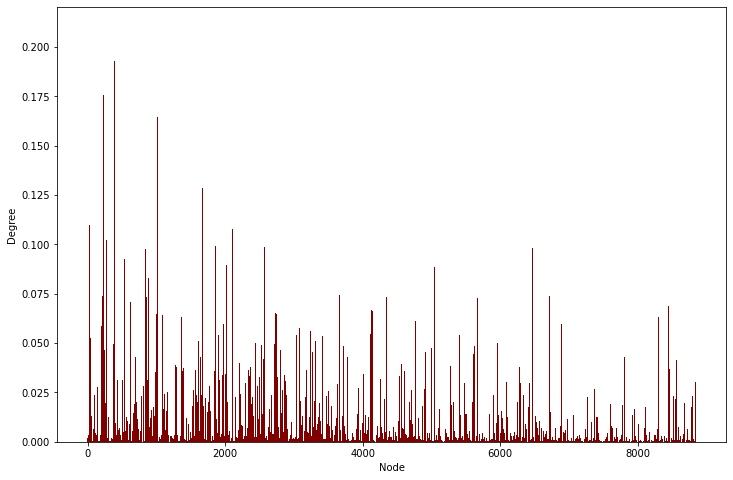

In [16]:
plt.figure(figsize=(12, 8)) 
key = list(eigenVectorCentrality.keys());
value = list(eigenVectorCentrality.values());
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [17]:
print("Maximum value of eigenVector Centrality is",max(eigenVectorCentrality.values()))

Maximum value of eigenVector Centrality is 0.2098373305061468


**Katz Centrality**

In [18]:
katzCentrality = nx.katz_centrality(G1,max_iter=10000)
katzCentrality

{4628: 0.0137431538931228,
 4033: 0.012040011441948254,
 7108: 0.011696188325576678,
 3588: 0.014492964662126769,
 4828: 0.010606575298192996,
 1226: 0.022963969670037818,
 2181: 0.00997875862289037,
 1098: 0.008682261001022791,
 8252: 0.012185699767164661,
 3047: 0.012063214859727379,
 632: 0.013149162910080758,
 3924: 0.0073102742879657765,
 3810: 0.008731759740287918,
 5901: 0.010550575731284978,
 773: 0.012525779948607426,
 3505: 0.011046390180035838,
 8222: 0.01185292626236096,
 8408: 0.008277216794899046,
 7214: 0.009997525325071935,
 7833: 0.006995110860981974,
 682: 0.015188002866450594,
 3858: 0.029732706679931026,
 8526: 0.010035192787908497,
 8633: 0.00699887760807255,
 2900: 0.011179772017041067,
 1220: 0.012502838244081457,
 7868: 0.009652797613367852,
 955: 0.015398881209026584,
 2143: 0.010395487534925803,
 3051: 0.012686412920465745,
 8662: 0.009747096937258164,
 2685: 0.014670079813546618,
 3273: 0.012154151732872705,
 5599: 0.007210772847996352,
 1380: 0.0109508145775

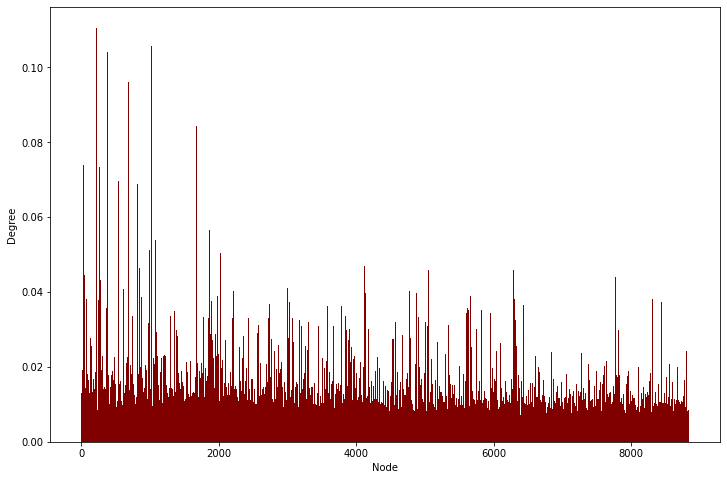

In [19]:
plt.figure(figsize=(12, 8)) 
key = list(katzCentrality.keys());
value = list(katzCentrality.values());
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [20]:
print("Maximum value of Katz Centrality is",max(katzCentrality.values()))

Maximum value of Katz Centrality is 0.11062801732900011


**Page Rank Centrality**

In [21]:
pageRankCentrality = nx.pagerank(G1, max_iter = 10000)
pageRankCentrality

{4628: 0.0002745434471283898,
 4033: 0.00021963145342068975,
 7108: 0.0002959496494372206,
 3588: 0.00025070960717322495,
 4828: 0.0001409292078191149,
 1226: 0.00030388601659561725,
 2181: 0.00017194840584106475,
 1098: 0.0001708620401935787,
 8252: 0.00013287506790357867,
 3047: 0.0002135176515574765,
 632: 0.00029659608623653207,
 3924: 6.581364277778852e-05,
 3810: 0.00016214952825610108,
 5901: 0.00019167993745047447,
 773: 0.00026834902266776087,
 3505: 0.00014530373083480782,
 8222: 0.00034512653964466317,
 8408: 0.00011374598910289269,
 7214: 0.00029055391808523076,
 7833: 7.395276826325106e-05,
 682: 0.0002618779438734338,
 3858: 0.00020242371755357658,
 8526: 0.00029082681489947006,
 8633: 7.363281441901102e-05,
 2900: 0.00028227321914973556,
 1220: 0.00036305535352114366,
 7868: 0.0001450834463444532,
 955: 0.00029645736690974236,
 2143: 0.0002039787645303829,
 3051: 0.0002683415072592862,
 8662: 0.0001576845163079622,
 2685: 0.0003672417497933239,
 3273: 0.00026718918867495

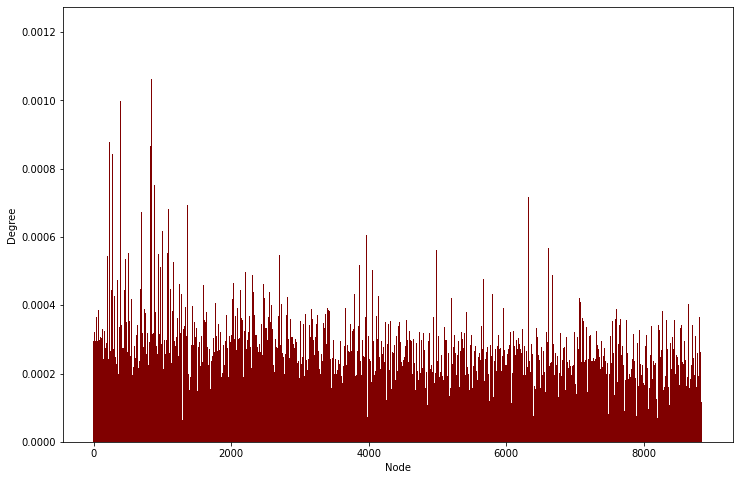

In [22]:
plt.figure(figsize=(12, 8)) 
key = list(pageRankCentrality.keys());
value = list(pageRankCentrality.values());

plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [23]:
print("Maximum value of Page Rank Centrality is",max(pageRankCentrality.values()))

Maximum value of Page Rank Centrality is 0.0012129455073654912


**Closenness Centrality**

In [24]:
closenessCentrality = nx.closeness_centrality(G1)
closenessCentrality

{4628: 0.14918210694180745,
 4033: 0.14529696623918542,
 7108: 0.1365422864552176,
 3588: 0.15206075847435058,
 4828: 0.14683011187845033,
 1226: 0.1608188523394389,
 2181: 0.13891413128340888,
 1098: 0.1259918180107135,
 8252: 0.14934709406523183,
 3047: 0.1463743536418902,
 632: 0.14712095816439075,
 3924: 0.12774437549470574,
 3810: 0.12577312851668532,
 5901: 0.14006680977311353,
 773: 0.14363560657976765,
 3505: 0.1463094761858917,
 8222: 0.1358989556146848,
 8408: 0.12944759672741876,
 7214: 0.12598647507283933,
 7833: 0.11150304266223632,
 682: 0.15338360621057484,
 3858: 0.1663756653707403,
 8526: 0.12316344624889101,
 8633: 0.10928606627646725,
 2900: 0.13198663062297855,
 1220: 0.1342318793038574,
 7868: 0.13871954188091537,
 955: 0.1553120771985584,
 2143: 0.1325933709137117,
 3051: 0.1420831233981025,
 8662: 0.13388103326615552,
 2685: 0.14381638962568677,
 3273: 0.1433549058431106,
 5599: 0.1248954079410024,
 1380: 0.1468373690197763,
 3088: 0.16563821747840235,
 3368: 0.1

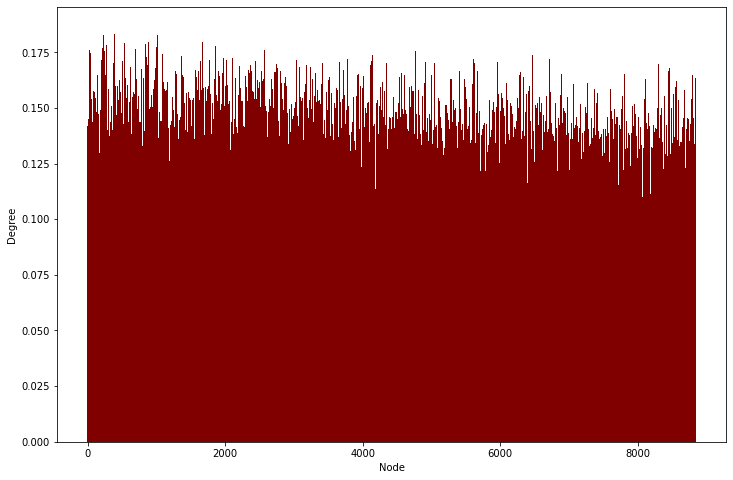

In [25]:
plt.figure(figsize=(12, 8)) 
key = list(closenessCentrality.keys());
value = list(closenessCentrality.values());
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [26]:
print("Maximum value of Closeness Centrality is",max(closenessCentrality.values()))

Maximum value of Closeness Centrality is 0.18604672127580074


**Betweenness Centrality**

In [27]:
betweennessCentrality = nx.betweenness_centrality(G1)
betweennessCentrality

{4628: 0.002681566770940542,
 4033: 0.0018405394037749915,
 7108: 0.0015917425530545773,
 3588: 0.00417411155460575,
 4828: 0.0006468303169590536,
 1226: 0.004382441683109682,
 2181: 0.0008623302156457915,
 1098: 0.0004825738845848781,
 8252: 0.001282870002739584,
 3047: 0.0015678997129579969,
 632: 0.0038824479315839907,
 3924: 0.0,
 3810: 0.00041946691500854084,
 5901: 0.0013597843082384993,
 773: 0.002221556145432822,
 3505: 0.0018449389593185182,
 8222: 0.0023909027595015305,
 8408: 0.0004153894975605578,
 7214: 0.0010061536237043324,
 7833: 0.0,
 682: 0.0027245654937445986,
 3858: 0.003598852841027614,
 8526: 0.001001133640035979,
 8633: 0.0,
 2900: 0.0015204485530417766,
 1220: 0.002158816123817448,
 7868: 0.0007162590871140635,
 955: 0.004557970665358266,
 2143: 0.0019736644587857806,
 3051: 0.0026523152131337087,
 8662: 0.0013647618331743912,
 2685: 0.00477625548545423,
 3273: 0.0017950429272012736,
 5599: 0.0,
 1380: 0.0006054222416833065,
 3088: 0.001587075150387475,
 3368: 0

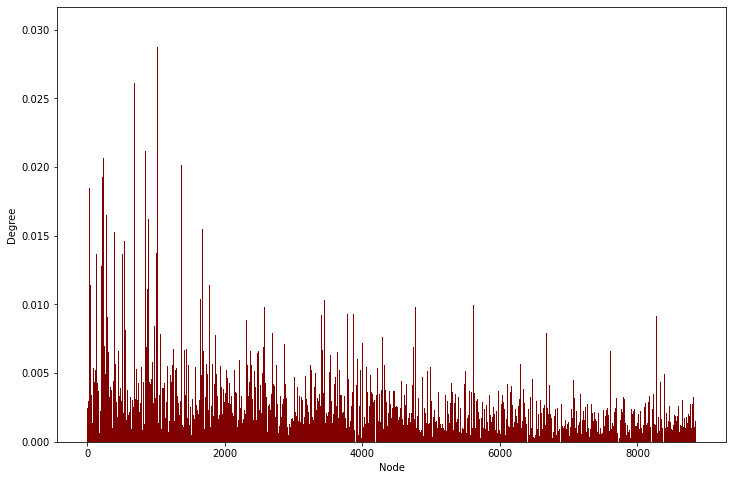

In [28]:
plt.figure(figsize=(12, 8)) 
key = list(betweennessCentrality.keys());
value = list(betweennessCentrality.values());
plt.bar(key,value, color ='maroon',width=10
        ) 
plt.xlabel('Node')
plt.ylabel('Degree')
plt.show()

In [29]:
print("Maximum value of Betweenness Centrality is",max(betweennessCentrality.values()))

Maximum value of Betweenness Centrality is 0.030151186356413548


# **Clustering Coefficient**

In [30]:
localClusteringCoefficient=nx.clustering(G)
localClusteringCoefficient

{0: 0.02564102564102564,
 1: 0.013071895424836602,
 2: 0,
 3: 0,
 4: 0,
 5: 0.01098901098901099,
 6: 0,
 7: 0,
 8: 0,
 9: 0.03333333333333333,
 10: 0.008333333333333333,
 310: 0,
 1091: 0,
 1213: 0,
 1517: 0,
 3082: 0,
 3084: 0.009523809523809525,
 3326: 0,
 3327: 0,
 3328: 0,
 3329: 0,
 3472: 0,
 3094: 0,
 269: 0,
 761: 0,
 1465: 0,
 2648: 0,
 2649: 0.1,
 3151: 0,
 3460: 0,
 1066: 0.004597701149425287,
 1247: 0,
 1815: 0.008658008658008658,
 1978: 0,
 2251: 0,
 2252: 0,
 2256: 0,
 2257: 0,
 3324: 0,
 3325: 0,
 1009: 0,
 1576: 0.002849002849002849,
 1914: 0,
 3259: 0.016666666666666666,
 3330: 0,
 3331: 0,
 3332: 0.007352941176470588,
 3333: 0,
 731: 0,
 748: 0,
 807: 0,
 808: 0,
 809: 0,
 810: 0,
 811: 0,
 812: 0,
 813: 0,
 814: 0.05454545454545454,
 11: 0,
 12: 0,
 13: 0.014705882352941176,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0.008333333333333333,
 21: 0,
 708: 0,
 1276: 0,
 1482: 0,
 1590: 0,
 1632: 0,
 2885: 0,
 3334: 0,
 3335: 0,
 3336: 0,
 3337: 0,
 460: 0.025,
 

In [31]:
globalClusteringCoefficient = nx.average_clustering(G)
globalClusteringCoefficient

0.007201065671103098

In [32]:
reciprocity=nx.overall_reciprocity(G)
transitivity=nx.transitivity(G)

print(reciprocity)
print(transitivity)

0.0
0.007597946550176967
